In [ ]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load csv file
df=pd.read_csv('/content/drive/MyDrive/machine learning/led.csv')

In [ ]:
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.shape

(2938, 22)

Preprocessing

In [ ]:
#check for null values
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

In [ ]:
#fill null values with mean of that column
m=df['Lifeexpectancy'].mean()
df['Lifeexpectancy'].fillna(m,inplace=True)

In [ ]:
m=df['AdultMortality'].mean()
df['AdultMortality'].fillna(m,inplace=True)

In [ ]:
m=df['Alcohol'].mean()
df['Alcohol'].fillna(m,inplace=True)

In [ ]:
m=df['HepatitisB'].mean()
df['HepatitisB'].fillna(m,inplace=True)

In [ ]:
m=df['BMI'].mean()
df['BMI'].fillna(m,inplace=True)

In [ ]:
m=df['Polio'].mean()
df['Polio'].fillna(m,inplace=True)

In [ ]:
m=df['Totalexpenditure'].mean()
df['Totalexpenditure'].fillna(m,inplace=True)

In [ ]:
m=df['Diphtheria'].mean()
df['Diphtheria'].fillna(m,inplace=True)

In [ ]:
m=df['GDP'].mean()
df['GDP'].fillna(m,inplace=True)

In [ ]:
m=df['Population'].mean()
df['Population'].fillna(m,inplace=True)

In [ ]:
m=df['thinness1-19years'].mean()
df['thinness1-19years'].fillna(m,inplace=True)

In [ ]:
m=df['thinness5-9years'].mean()
df['thinness5-9years'].fillna(m,inplace=True)

In [ ]:
m=df['Incomecompositionofresources'].mean()
df['Incomecompositionofresources'].fillna(m,inplace=True)

In [ ]:
m=df['Schooling'].mean()
df['Schooling'].fillna(m,inplace=True)

In [ ]:
#Cross check
df.isnull().sum()

Country                         0
Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated().sum()

0

In [ ]:
#apply Label encoder to vonvert object type data into integer type
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['Country']=le.fit_transform(df['Country'])

In [ ]:
df['Status']=le.fit_transform(df['Status'])

In [ ]:
#check  datatypes
df.dtypes

Country                           int64
Year                              int64
Status                            int64
Lifeexpectancy                  float64
AdultMortality                  float64
infantdeaths                      int64
Alcohol                         float64
percentageexpenditure           float64
HepatitisB                      float64
Measles                           int64
BMI                             float64
under-fivedeaths                  int64
Polio                           float64
Totalexpenditure                float64
Diphtheria                      float64
HIV/AIDS                        float64
GDP                             float64
Population                      float64
thinness1-19years               float64
thinness5-9years                float64
Incomecompositionofresources    float64
Schooling                       float64
dtype: object

Model creation

In [ ]:
#define input and output variable
x=df.drop('Lifeexpectancy',axis=1) #input varaible
y=df['Lifeexpectancy'] #output varaaible

In [ ]:
#split data into 2 parts ie. training(70%) & testing(30%)
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.3,random_state=1)


In [ ]:
# apply std scaller  omn x_train and x_test
from sklearn.preprocessing import StandardScaler

In [ ]:
#create object
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

Training Model

In [ ]:
#trian data with linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)# trian model with 70% data


LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)# predict output using 30% test data
y_pred

array([79.20055566, 57.14122939, 65.242313  , 68.14189855, 40.79985026,
       82.25631815, 68.33385686, 71.96271449, 70.13711967, 76.35620859,
       74.59463861, 83.29233791, 55.6210363 , 55.89629759, 76.26261436,
       63.18775504, 75.57450473, 70.00553571, 63.62248808, 50.7654916 ,
       72.31069197, 71.3504347 , 67.91046335, 60.1592547 , 72.25431493,
       80.86909542, 77.99782431, 67.05747292, 72.5161327 , 60.77912734,
       68.29335879, 55.45815858, 76.86676691, 72.92329143, 80.19493027,
       76.08762035, 72.75836331, 82.54974556, 72.67646895, 71.48876256,
       69.90823275, 81.98133279, 69.40515913, 54.99973315, 72.63228353,
       73.47080019, 57.64115118, 67.22388647, 71.13601859, 48.4596766 ,
       63.79567318, 72.0553172 , 70.84037775, 48.06501278, 72.62854349,
       73.45693534, 68.40353164, 75.55709904, 65.29241818, 72.39785128,
       52.03963827, 35.71443912, 60.80186949, 69.789839  , 76.53393773,
       71.58875793, 70.23134445, 65.29672319, 75.90878545, 64.55

In [ ]:
#create dictionary
dict={'Actual':y_test,'Predicted':y_pred}
#convert dictionary intoDataFrame
df1=pd.DataFrame(dict)
#to add input column x_test in existing column


In [ ]:
df1

,Actual,Predicted
1268,82.1,79.200556
2719,58.4,57.141229
2710,63.3,65.242313
2028,67.9,68.141899
351,47.8,40.799850
...,...,...
2870,72.4,71.106895
934,81.7,76.157733
1966,76.5,73.162275
2111,68.3,70.141543


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))

16.801709810043505


In [ ]:
print(r2_score(y_test,y_pred))

0.8068609265388771


In [ ]:
#We got r2 score of 80% 

Verifing model

In [ ]:
# we need to check 4 assumptions of linear regression 

In [ ]:
#Check the Assumptions of LinearRegression
#1st Assumption:Should not be Multicolinearity in linear regression

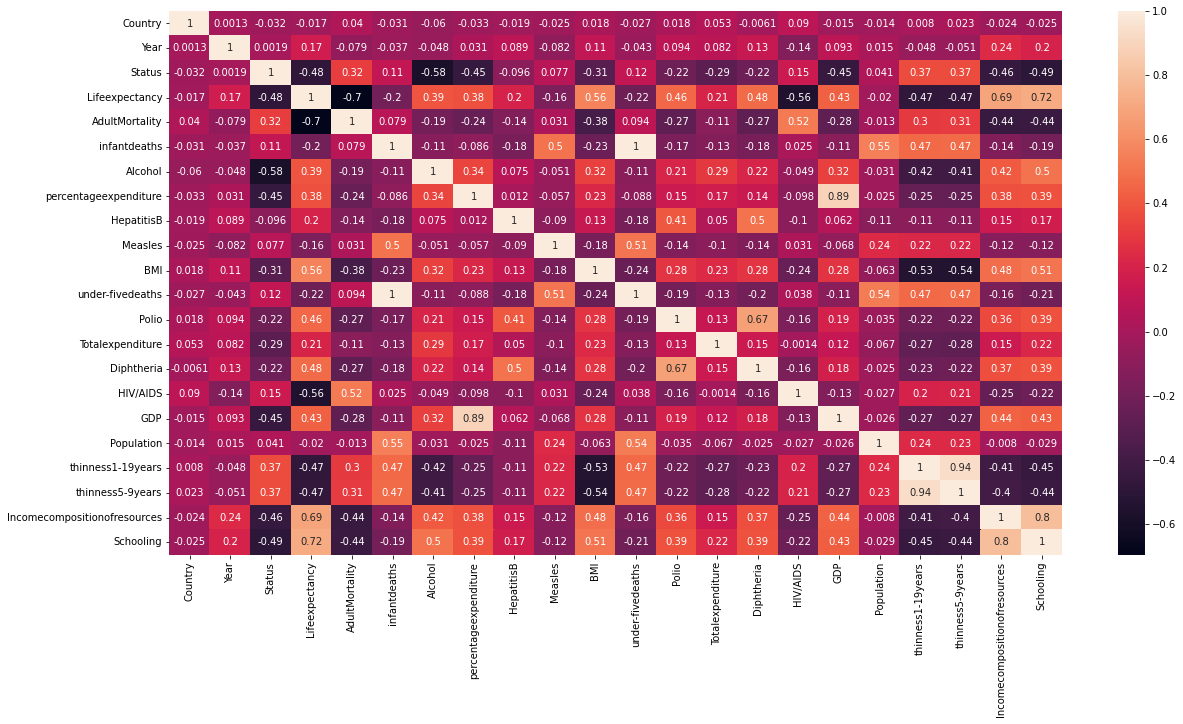

In [ ]:
plt.figure(figsize=(20,10))
sb.heatmap(df.corr(),annot= True)

In [ ]:
#We found multicolinearity between input varaible 
#Hence 1st assumption faild

In [ ]:
#Now check 2nd assumption of LinearRegression
#There should be a linear relationship between input and output
#to check linear relationship find residual
residual=y_test-y_pred
residual

1268    2.899444
2719    1.258771
2710   -1.942313
2028   -0.241899
351     7.000150
          ...   
2870    1.293105
934     5.542267
1966    3.337725
2111   -1.841543
1501   -3.743753
Name: Lifeexpectancy, Length: 882, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


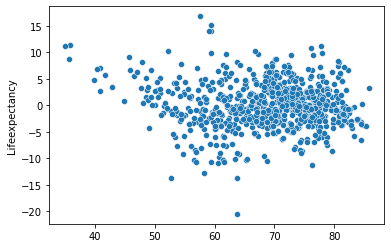

In [ ]:
#visualize scatter plot between y_pred and residual
sb.scatterplot(y_pred,residual)
plt.show()

In [ ]:
#Here data is linear 
#hence 2nd assumption fullfilled

In [ ]:
# 3rd assumptionn: Data should be homoscedestic if it is linear

In [ ]:
#Here we see homoscedestic pattern in our data 
#Hence 3rd assumption fulfilled

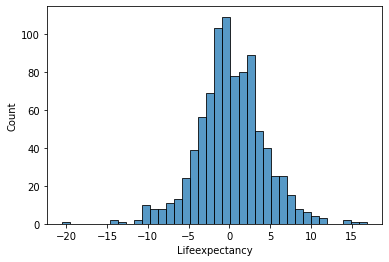

In [ ]:
#To chech 4th Assumption: Residual should be normally distributed
sb.histplot(residual)
plt.show()

In [ ]:
residual.skew()

-0.09509957075509891

In [ ]:
# we got skewness of -0.095 
# Heance 4th assumption satisfied

Conclusion:

Out of 4 assumption 3 asssumptions are fulfilled
 
we got accuracy of 80% with linear regression